In [1]:
import socket
import numpy as np
import matplotlib.pyplot as plt

def send(key,TCP_IP = '127.0.0.1', TCP_PORT = 5006, BUFFER_SIZE = 1024):
    '''
    sends data to the server
    this funciton interacts with the server in the same way as the beamline interacts with motors
    '''
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.connect((TCP_IP, TCP_PORT))
    s.send(str(key).encode())
    data = s.recv(BUFFER_SIZE).decode()
    s.close()
    return data

In [3]:
'''
test, should return OUTPut = OFF
'''
data = send('VOLTage = 2.0')
print(data)

VOLTage = 2.0000E+00


In [4]:
#!/usr/bin/env python
'''
our default setup on the signal generator:
'''
parameters = {'FREQuency': '1.000000E+00', 
        'PERiod': '1.000000E+00', 
        'VOLTage': '6.000E-01', 
        'VOLTage:UNIT': 'VOLT', 
        'VOLTage:HIGH': '6.000E-01', 
        'VOLTage:LOW': '0.0E+00', 
        'VOLTage:OFFSet': '0.0E+00', 
        'FUNCtion:PULSe:WIDTh:HIGH': '3.000000E-04', 
        'FUNCtion:PULSe:WIDTh:LOW': '9.997000E-01', 
        'FUNCtion:PULSe:DCYCle': '3.000000E-02', 
        'FUNCtion:PULSe:ETIMe': '8.0E-09', 
        'TRIGger:SOURce': 'EXT', 
        'BURSt:MODE': 'TRIG', 
        'BURSt:NCYCles': '1.0E+00', 
        'BURSt:INTernal:PERiod': '1.000001E+00', 
        'BURSt:PHASe': '0.0E+00', 
        'BURSt:STATe': 'ON'}

def set_params(parameters, TCP_IP = '127.0.0.1', TCP_PORT = 5006, BUFFER_SIZE = 1024):
    '''
    sets multiple parameters input as a dictionary (?)
    this is a function we can use, and I don't think the beamline has any equivalent
    '''
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.connect((TCP_IP, TCP_PORT))
    s.send(str(parameters).encode())
    s.close()

def get_params(TCP_IP = '127.0.0.1', TCP_PORT = 5006, BUFFER_SIZE = 1024):
    '''
    get all params by sending '?' to the server
    returns a dictionary of parameters
    '''
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.connect((TCP_IP, TCP_PORT))
    s.send('?'.encode())
    data = s.recv(BUFFER_SIZE).decode()
    print(data)
    parameters = data_to_dict(data)
    s.close()
    return parameters

def data_to_dict(inp):
    '''
    converts a string to a dictionary, splitting the data at ':' for each key/val pair
    the string is assumed to be generated by casting a dictionary to a string, i.e. str(dict)
    '''
    spl = inp.split("', '")
    spl[0] = spl[0][2:]
    spl[-1] = spl[-1][:-2]
    parameters = {}
    for i, sp in enumerate(spl):
        key_val = sp.split("': '")
        parameters[key_val[0]] = key_val[1]
    return parameters

In [5]:
#parameters = get_params()
#print(str(parameters))

In [6]:
#set_params(parameters)

In [7]:
'''
Communication with signal generator
'''
data = send('OUTPut = ON')
print(data)

OUTPut = ON


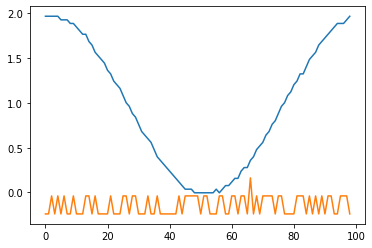

In [14]:
'''
Communication with oscilloscope
'''
waveforms = send('C1C2?',TCP_PORT = 5007, BUFFER_SIZE = 2048*2)

waveform_1 = np.array([float(s.strip(',')) for s in waveforms.split('_')[0].split(',')[1:]])
waveform_2 = np.array([float(s.strip(',')) for s in waveforms.split('_')[1].split(',')[1:]])

fig, ax = plt.subplots()
ax.plot(waveform_1)
ax.plot(waveform_2)
#av = np.average(waveform_1)
#ax.plot([0,100],av*np.array([1,1]))
#ax.text(50, av+0.03*np.max(waveform_1), f'{np.average(waveform_1):.3f} V', ha = 'center', backgroundcolor = [1,1,1, 0.3])

In [16]:
send('C1C2?',TCP_PORT = 5007, BUFFER_SIZE = 2048*2)

'C1C2 = #800001399 1.16263e+000, 1.12243e+000, 1.04203e+000, 1.00182e+000, 9.21422e-001, 8.81221e-001, 8.00819e-001, 7.20417e-001, 6.80216e-001, 6.40015e-001, 5.59613e-001, 5.19412e-001, 4.39010e-001, 3.98809e-001, 3.58608e-001, 3.18407e-001, 2.78206e-001, 2.38005e-001, 1.57603e-001, 1.17402e-001, 1.17402e-001, 7.72010e-002, 7.72010e-002, 3.70000e-002,-3.20100e-003,-3.20100e-003,-3.20100e-003,-3.20100e-003,-4.34020e-002,-4.34020e-002,-3.20100e-003,-4.34020e-002,-3.20100e-003, 3.70000e-002, 3.70000e-002, 3.70000e-002, 7.72010e-002, 1.17402e-001, 1.97804e-001, 1.97804e-001, 2.38005e-001, 2.78206e-001, 3.18407e-001, 3.98809e-001, 4.39010e-001, 5.19412e-001, 5.19412e-001, 5.99814e-001, 6.40015e-001, 7.20417e-001, 7.60618e-001, 8.41020e-001, 8.81221e-001, 9.61623e-001, 1.04203e+000, 1.08223e+000, 1.16263e+000, 1.20283e+000, 1.28323e+000, 1.36363e+000, 1.40383e+000, 1.48424e+000, 1.52444e+000, 1.56464e+000, 1.60484e+000, 1.64504e+000, 1.68524e+000, 1.72544e+000, 1.76564e+000, 1.80584e+000, 1

In [18]:
send('AvgC1C2?',TCP_PORT = 5007, BUFFER_SIZE = 2048*2)

'AvgC1C2 = 0.9660903434343435, -0.15168975454545452'

In [3]:
send('READ?',TCP_PORT = 5008)

'READ = -3.176665E-09'